##Tensorflow(전이학습).Part1

Tensorflow를 이용하여 전이학습을 해보겠습니다.

전이학습과 더불어서 다른 방법들도 여러가지 적용할 수 있지만,

이번에는 모델만 가지고 와서 결과를 확인해보겠습니다.

###데이터셋 다운

cifar10 데이터셋을 사용하도록 하겠습니다.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


---

###데이터 모양 확인

In [2]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


---

###라벨 데이터 맞추기

cifar10은 10개의 클래스로 이루어져있습니다.

따라서 라벨을 10개로 맞추고 진행하겠습니다.

In [3]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print(train_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)


----

###학습 이미지 시각화

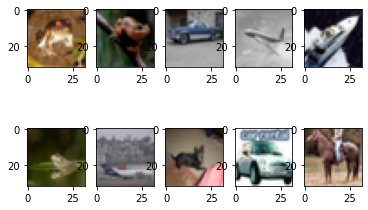

In [4]:
import matplotlib.pyplot as plt

for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(train_images[i*5000])
plt.show()

---

###테스트 이미지 시각화

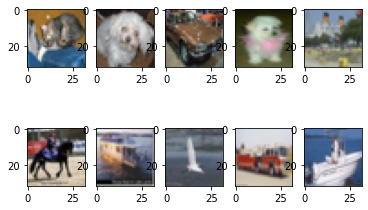

In [5]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(test_images[i*1000])
plt.show()

---

###모델 가져오기

VGG16 모델을 가져와보겠습니다.

가중치를 imagenet으로 하고 불러오겠습니다.

In [11]:
model = tf.keras.applications.VGG16(input_shape = (32, 32, 3), include_top = False, weights = 'imagenet')

model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

---

###모델 튜닝

10개의 클래스 중에서 하나를 분류하는 모델을 만들것이기 때문에

Dense 레이어를 추가하여 10, softmax를 써줍니다.

그 위에 GlobalAveragePooling2D이 있는데 GlobalAveragePooling2D 말고

Flatten을 사용하셔도 무관합니다.

In [14]:
model.trainable = False

new_model = tf.keras.models.Sequential([
    model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


---

###모델 학습

In [15]:
new_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [16]:
new_model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels), batch_size= 256)

Epoch 1/10
196/196 [==============================] - 9s 41ms/step - loss: 10.3357 - accuracy: 0.3584 - val_loss: 5.0763 - val_accuracy: 0.4639
Epoch 2/10
196/196 [==============================] - 7s 38ms/step - loss: 3.8004 - accuracy: 0.4950 - val_loss: 2.8988 - val_accuracy: 0.5140
Epoch 3/10
196/196 [==============================] - 7s 37ms/step - loss: 2.2736 - accuracy: 0.5373 - val_loss: 1.9708 - val_accuracy: 0.5466
Epoch 4/10
196/196 [==============================] - 7s 38ms/step - loss: 1.6144 - accuracy: 0.5646 - val_loss: 1.6316 - val_accuracy: 0.5333
Epoch 5/10
196/196 [==============================] - 7s 38ms/step - loss: 1.3747 - accuracy: 0.5768 - val_loss: 1.3991 - val_accuracy: 0.5704
Epoch 6/10
196/196 [==============================] - 7s 38ms/step - loss: 1.2831 - accuracy: 0.5850 - val_loss: 1.3496 - val_accuracy: 0.5734
Epoch 7/10
196/196 [==============================] - 7s 38ms/step - loss: 1.2774 - accuracy: 0.5852 - val_loss: 1.3618 - val_accuracy: 0.562

---

###두번째 모델 가져오기

이번에는 ResNet50으로 결과를 확인해보겠습니다.

In [7]:
model = tf.keras.applications.ResNet50(pooling = 'avg', input_shape = (32, 32, 3), include_top = False, weights = 'imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

---

###모델 튜닝

위에서 했던 것 처럼 모델을 튜닝해줍니다.

In [8]:
model.trainable = False

new_model = tf.keras.models.Sequential([
    model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


---

###결과 확인

In [9]:
new_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
new_model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels), batch_size= 256)

Epoch 1/10
196/196 [==============================] - 19s 44ms/step - loss: 1.6963 - accuracy: 0.4824 - val_loss: 1.2985 - val_accuracy: 0.5672
Epoch 2/10
196/196 [==============================] - 7s 34ms/step - loss: 1.1992 - accuracy: 0.5932 - val_loss: 1.2172 - val_accuracy: 0.5882
Epoch 3/10
196/196 [==============================] - 7s 34ms/step - loss: 1.0875 - accuracy: 0.6265 - val_loss: 1.1787 - val_accuracy: 0.6052
Epoch 4/10
196/196 [==============================] - 7s 34ms/step - loss: 1.0329 - accuracy: 0.6414 - val_loss: 1.1767 - val_accuracy: 0.6044
Epoch 5/10
196/196 [==============================] - 7s 34ms/step - loss: 1.0071 - accuracy: 0.6503 - val_loss: 1.1737 - val_accuracy: 0.6085
Epoch 6/10
196/196 [==============================] - 7s 35ms/step - loss: 0.9721 - accuracy: 0.6589 - val_loss: 1.1903 - val_accuracy: 0.6075
Epoch 7/10
196/196 [==============================] - 7s 34ms/step - loss: 0.9535 - accuracy: 0.6671 - val_loss: 1.1879 - val_accuracy: 0.599

----